# <font color="#ff9900"> **MLP**</font>
---

Um <font color="#66ffff">**Perceptron Multicamadas (Multilayer Perceptron - MLP)**</font> é uma classe de rede neural artificial *feedforward*. Um MLP consiste em pelo menos três camadas de nodos: uma camada de entrada (*input*), uma camada oculta (*hidden*) e uma camada de saída (*output*). Com exceção dos nodos de entrada, cada nodo é um neurônio que usa uma **função de ativação não-linear**. MLP utiliza uma técnica de aprendizado supervisionado chamada *backpropagation* para o treinamento. Suas múltiplas camadas e ativação não-linear distinguem MLP de um Perceptron, que é convencionalmente linear. 

Assim, o MLP pode distinguir dados que não são linearmente separáveis. É aplicável a problemas de regressão e classificação.


---

> 💡 **Observação**: Para executar a célula de código (aquelas marcadas com `` []``), posicione dentro dela e pressione ``Ctrl``+``Enter``. Deve-se respeitar a **sequência** de execução das células.

---

Importação das Bibliotecas
--

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``Pytorch``.


PyTorch (https://pytorch.org/) é um *framework open source* para aprendizado de máquina usado para construir e treinar redes neurais artificiais. Desenvolvido pela equipe de pesquisa de IA do Facebook, PyTorch é conhecido por sua flexibilidade e facilidade de uso, tornando-se uma escolha muito popular entre pesquisadores e profissionais na comunidade de *deep learning*.

Oferece um grafo computacional dinâmico, o que permite iterações mais rápidas e depuração mais intuitiva em comparação com grafos estáticos usados por outros frameworks populares, como ``TensorFlow``. Assim, com PyTorch é possível definir e modificar a arquitetura de NN durante o treinamento, tornando mais fácil experimentar diferentes arquiteturas de modelo e hiperparâmetros.

PyTorch também fornece uma ampla gama de ferramentas e utilitários para carregamento de dados, pré-processamento e visualização, tornando-o uma ferramenta abrangente para toda a pipeline de aprendizado de máquina. 


In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch
import torch.nn as nn  # classes and functions for building and training NN

# version
print(f'PyTorch:{torch.__version__}')

PyTorch:2.0.0+cu118


Note o ``+cu118`` indicando a versão do *toolkit* CUDA com o qual o PyTorch foi construído. CUDA é uma plataforma de computação paralela e modelo de programação usado para treinar modelos de aprendizado profundo em GPUs.


E vamos configurar o pyplot para apresentar nossas imagens.

In [22]:
plt.style.use('dark_background')  # "dark" theme
plt.rcParams["font.size"] = 12

plt.rcParams["figure.figsize"] = (10, 4)

Importação de um *Dataset* e Análise Exploratória
--

``Scikit-learn`` (https://scikit-learn.org/stable/) possui uma série de *datasets built-in* que podem ser usados para testar os modelos de ML, seja com propósitos educacionais ou mesmo de *benchmarking*. Um de tais *datasets* é o Iris, que contém características da planta íris (*Iris sp.*), mostrada a seguir. 

<img src="https://drive.google.com/uc?id=1CFPpZphJaaGNS9rTZKS5wurnkOX0JCbU" width="200" height="auto">

O dataset é originário do <font color="#66ffff">UC Irvine Machine Learning Repository</font> (https://archive.ics.uci.edu/ml/index.php).
Os dados consistem em 150 amostras (*samples*) de três espécies de íris. 
Na verdade, as três espécies são visualmente muito parecidas, mas diferenças em medidas das pétalas e sépalas permitem distinguir as espécies entre si, isto é, **classificar**.

Este dataset é um exemplo clássico de aprendizado supervionado. Cada linha representa uma observação ou instância. Como descritor temos o comprimento (*length*) e largura (*width*) da petála (*petal*) e da sépala (*sepal*). A saída esperada é uma das espécies: Iris-setosa, Iris-versicolor ou Iris-virginica. 

<img src="https://drive.google.com/uc?id=16rE8raXoby8NqA0oixGXV8H22BXLf4Fe" width="auto" height="auto">



In [16]:
from sklearn import datasets

iris = datasets.load_iris()  # Loading the dataset iris

print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Para realizarmos uma exploração, vamos converter o ``array`` numpy em um ``DataFrame`` Pandas, selecionando alguns campos de interesse.

In [17]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

iris.head(5)  # first 5 instances (rows)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Como podemos observar, o ``DataFrame``gerado contém o comprimento (``length``) e largura (``width``) em centímetors das sépala (``sepal``) e pétala (``petal``), respectivamente. Também há uma coluna ``target`` indicando a codificação numérica de cada espécie (classe): Setosa(0), Versicolor(1) e Virginica(2).

Vamos adicionar o nome da classe (espécie) para fins de visualizaçãp/

In [18]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

Exibindo novamente 5 linhas.

In [19]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Obtendo um sumário da distribuição das instâncias.

In [20]:
iris.groupby('species').size()


species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [21]:
iris.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


Preparação do Dataset
--



In [23]:
# Droping the target and species since we only need the measurements
X = iris.drop(columns = ['target', 'species'], axis=1)
X.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vamos tentar classificar as três espécies. Antes de mais nada vamos converter para *numpy arrays*.

In [24]:
# converting into numpy array 
X = X.to_numpy()[: , :]  
y = iris['target'].to_numpy().astype(int)

E depois separar o dataset nos conjuntos de treinamento ($70\%$) e teste ($30\%$). Novamente a ``Scikit-learn`` nos auxilia com a função ``train_test_split``.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')


Training: 105 instances 
Test: 45 instances

Training shape:(105, 4) 
First row:[5.5 2.4 3.7 1. ]

Test shape:(45, 4) 
First row:[6.1 2.8 4.7 1.2]

Labels 
	training: 105 instances 
	test: 45 instances

Labels training shape:(105,) 
set:[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]

Labels test shape:(45,) 
set:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


Escalar os Dados
--

Escalar os dados é uma etapa importante de pré-processamento em *machine learning*. Benefícios:

1) Prevenção de viés.
2) Aceleração da convergência.
3) Redução da instabilidade numérica:


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# computes the mean and std dev of the data and scales the data using these values.
X_train = scaler.fit_transform(X_train)  

X_test = scaler.transform(X_test)

Conversão para Torch Tensor
--




**Torch Tensor**  é a estrutura de dados fundamental no PyTorch. 

Tensores são *arrays* multi-dimensionais que podem ser usados para cálculos e *backpropagation* durante o treinamento. Eles são os blocos básicos para criar e manipular modelos de aprendizado profundo no PyTorch.


In [28]:
X_train = torch.FloatTensor(X_train)  # Float
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)  # 64-bit integer
y_test = torch.LongTensor(y_test)

NN
--


In [47]:
class NeuralNetworkClassificationModel(nn.Module):
    """
    A neural network classification model for predicting the class of input data.
    
    Parameters
    ----------
    input_dim : int
        The dimension of the input features.
    output_dim : int
        The number of classes in the output.
    
    Attributes
    ----------
    input_layer : torch.nn.Linear
        The input layer of the neural network.
    hidden_layer1 : torch.nn.Linear
        The first hidden layer of the neural network.
    output_layer : torch.nn.Linear
        The output layer of the neural network.
    relu : torch.nn.ReLU
        The ReLU activation function.
    
    Methods
    -------
    forward(x)
        Performs a forward pass of the neural network given an input tensor x.
    """  
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()

        self.input_layer    = nn.Linear(input_dim, 128)
        self.hidden_layer1  = nn.Linear(128, 64)
        self.output_layer   = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self, x):
        """
        Performs a forward pass of the neural network given an input tensor x.
        
        Parameters
        ----------
        x : torch.Tensor
            The input tensor of shape (batch_size, input_dim).
        
        Returns
        -------
        out : torch.Tensor
            The output tensor of shape (batch_size, output_dim).
        """      
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out


Criação do modelo.

In [48]:
input_dim  = 4   # We have 4 inputs: sepal_length, sepal_width, petal_length, petal_width
output_dim = 3  # We have 3 inputs: 3 categories setosa,versicolor and virginica

model = NeuralNetworkClassificationModel(input_dim, output_dim)

Otimizador
--

Vamos configurar um otimizador no PyTorch.

Como já vimos, algoritmos de otimização são usados para ajustar os pesos e vieses de uma NN durante o treinamento, a fim de minimizar a função de *loss*. 


- ``learning_rate`` é um hiperparâmetro que determina o quanto os pesos e vieses são ajustados em cada iteração do algoritmo de otimização. É um valor escalar escolhido tipicamente entre 0.0001 e 0.1, dependendo do problema.

- ``nn.CrossEntropyLoss()`` é uma função de perda usada para problemas de classificação multiclasse, que é nosso caso aqui. Ela recebe a saída do modelo e as etiquetas verdadeiras como entrada, e calcula a diferença entre as probabilidades de classe previstas e as probabilidades de classe verdadeiras. O objetivo do algoritmo de otimização é minimizar essa função de perda.

- ``torch.optim.Adam()`` é um otimizador que usa uma taxa de aprendizagem adaptativa. Ele recebe os parâmetros do modelo como entrada e define a taxa de aprendizagem usando o parâmetro ``lr``. O otimizador usa o gradiente da função de perda em relação aos parâmetros do modelo para atualizar os pesos e vieses durante o treinamento.


In [49]:
# creating our optimizer and loss function object
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

Treinamento
--

Vamos criar uma função para receber os parâmetros e realizar o treinamento efetivamente.

In [51]:
def train_NN(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses):
    """
    Train a neural network model for classification.

    Parameters:
    -----------
    model : torch.nn.Module
        A PyTorch neural network model.
    optimizer : torch.optim.Optimizer
        The optimization algorithm used to update the model parameters.
    criterion : torch.nn.modules.loss._Loss
        The loss function used to calculate the difference between the predicted and actual outputs.
    X_train : numpy.ndarray
        The training input data.
    y_train : numpy.ndarray
        The training output data.
    X_test : numpy.ndarray
        The testing input data.
    y_test : numpy.ndarray
        The testing output data.
    num_epochs : int
        The number of epochs to train the model.
    train_losses : numpy.ndarray
        An array to store the training losses for each epoch.
    test_losses : numpy.ndarray
        An array to store the testing losses for each epoch.

    Returns:
    --------
    None
    """  
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        
        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

Definição dos parâmetros para a função ``train_NN``.

In [52]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

Treinamento efetivo chamando a função ``train_NN``.

In [53]:
train_NN(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses)

Epoch 50/1000, Train Loss: 0.0310, Test Loss: 0.0038
Epoch 100/1000, Train Loss: 0.0025, Test Loss: 0.0988
Epoch 150/1000, Train Loss: 0.0005, Test Loss: 0.1345
Epoch 200/1000, Train Loss: 0.0003, Test Loss: 0.1447
Epoch 250/1000, Train Loss: 0.0002, Test Loss: 0.1511
Epoch 300/1000, Train Loss: 0.0001, Test Loss: 0.1393
Epoch 350/1000, Train Loss: 0.0001, Test Loss: 0.1390
Epoch 400/1000, Train Loss: 0.0001, Test Loss: 0.1437
Epoch 450/1000, Train Loss: 0.0001, Test Loss: 0.1471
Epoch 500/1000, Train Loss: 0.0000, Test Loss: 0.1492
Epoch 550/1000, Train Loss: 0.0000, Test Loss: 0.1516
Epoch 600/1000, Train Loss: 0.0000, Test Loss: 0.1556
Epoch 650/1000, Train Loss: 0.0000, Test Loss: 0.1580
Epoch 700/1000, Train Loss: 0.0000, Test Loss: 0.1597
Epoch 750/1000, Train Loss: 0.0000, Test Loss: 0.1616
Epoch 800/1000, Train Loss: 0.0000, Test Loss: 0.1629
Epoch 850/1000, Train Loss: 0.0000, Test Loss: 0.1638
Epoch 900/1000, Train Loss: 0.0000, Test Loss: 0.1651
Epoch 950/1000, Train Loss: 0

Avaliando a convergência.

``train_losses`` e ``test_losses``são *arrays* que contêm os valores obtidos turando o treinamento e teste da NN, respectivamente.


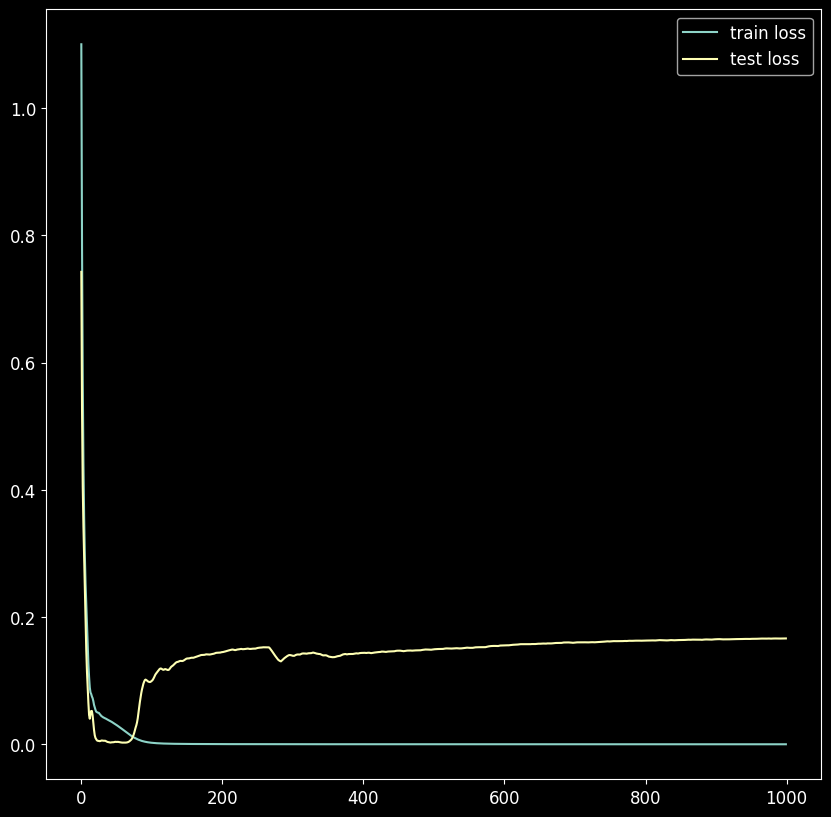

In [54]:
plt.figure(figsize=(10,10))

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')

plt.legend()
plt.show()

Predição
--

As predições de treino e teste são geradas utilizando o modelo treinado, que é passado através do conjunto de dados de treino e teste. 

O bloco de código com ``torch.no_grad()`` é usado para desativar o rastreamento de gradientes, o que economiza memória e aumenta a eficiência da inferência. Isso porque durante a inferência, não há necessidade de calcular gradientes, já que não há ajuste de parâmetros. Portanto, o bloco de código é usado para reduzir a sobrecarga computacional. 


In [55]:
predictions_train = []
predictions_test =  []

with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

As previsões geradas são armazenadas em ``predictions_train`` e ``predictions_test``.

Vamos dar uma olhada no menor conjunto (``predictions_test``) e o respectivo rótulo (``y_test``).

In [57]:
# Check how the predicted outputs look like 
print(predictions_test)  

print(y_test)

tensor([[ -6.8433,   9.2925,  -6.0378],
        [ 32.5827,  20.6370, -68.2381],
        [-31.1401, -28.8806,  40.6833],
        [ -6.4000,   9.8512,  -6.6397],
        [ -9.5212,   5.6237,  -1.8664],
        [ 27.6086,  16.1418, -56.7743],
        [  1.2141,  16.3946, -20.0695],
        [-15.4521, -10.0211,  15.7994],
        [-15.5408,   6.3444,   0.6554],
        [ -2.9522,  18.6848, -17.2708],
        [-10.8617,  -2.2234,   6.4593],
        [ 28.0940,   8.3246, -49.5335],
        [ 31.2003,  17.6997, -63.3960],
        [ 28.4865,   9.7391, -51.3437],
        [ 34.8878,  18.9019, -69.0438],
        [ -1.3548,  14.4411, -15.3271],
        [-19.3380, -15.9152,  24.1085],
        [ -5.7873,  15.9200, -13.2989],
        [ -5.1155,  14.6607, -11.8671],
        [-20.6554, -17.2328,  25.7434],
        [ 29.1333,   9.5085, -51.6117],
        [-11.1061,  -2.2243,   7.1322],
        [ 28.6686,  14.3787, -55.9704],
        [-19.7461, -15.4094,  23.6879],
        [ -4.6760,   0.5490,  -6.9262],


 Acurácia do Modelo
--

In [62]:
# taking argmax to compare with y_train or y_test

def get_accuracy_multiclass(pred_arr, original_arr):
    
    if len(pred_arr)!=len(original_arr):
        return False
    
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []

    # We'll get something like this in the pred_arr [32.5827,  20.6370, -68.2381]
    # so will be taking the index of that argument which has the highest value here 32.5827 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    
    final_pred = np.array(final_pred)
    count = 0
    
    # A simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count += 1

    return count/len(final_pred), final_pred

In [63]:
train_acc, _train_pred = get_accuracy_multiclass(predictions_train, y_train)
test_acc, _test_pred  = get_accuracy_multiclass(predictions_test, y_test)

In [69]:
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.98


C'est bon! 🥳 Uma taxa de  98%!

In [70]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Accuracy
acc = accuracy_score(_test_pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, _test_pred))

Accuracy:0.98
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: May 6th 2023*</font>